# Benchmarks

## Initialize

In [1]:
#library(Rmisc)
library(dtplyr)
library(tidyverse)
library(glue)
library(arrow)
library(patchwork)
library(data.table)
library("jsonlite")
library(ggthemes)

Warning message:
“package ‘tidyverse’ was built under R version 4.0.3”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

Warning message:
“package ‘ggplot2’ was built under R version 4.0.5”
Warning message:
“package ‘readr’ was built under R version 4.0.5”
Warning message:
“package ‘purrr’ was built under R version 4.0.3”
Warning message:
“package ‘dplyr’ was built under R version 4.0.5”
Warning message:
“package ‘stringr’ was built under R version 4.0.5”
Warning message:
“package ‘forcats’ was built under R version 4.0.3”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘arrow’ was built under R version 4.0.3”

Attaching package: ‘arrow’


The following object is masked from ‘p

In [2]:
if (grepl("sc", Sys.info()[["nodename"]], fixed=TRUE)) {
    base_path = "/sc-projects/sc-proj-ukb-cvd"
} else {
    base_path = "/data/analysis/ag-reils/ag-reils-shared/cardioRS"}
print(base_path)

project_label="22_medical_records"
project_path = glue("{base_path}/results/projects/{project_label}")
figure_path = glue("{project_path}/figures")
output_path = glue("{project_path}/data")

experiment = 220413
experiment_path = glue("{output_path}/{experiment}")

[1] "/sc-projects/sc-proj-ukb-cvd"


In [3]:
library(arrow)

## Load Data

In [4]:
data_records = arrow::read_feather(glue("{output_path}/baseline_records_220412.feather", as_data_frame=FALSE))

In [5]:
data_records_agg = data_records %>% summarise(across(-eid, ~sum(as.logical(.)))) %>% pivot_longer(everything(), names_to="record", values_to="n") %>% mutate(freq = n/502460)

In [6]:
data_shap = arrow::read_feather(glue("{experiment_path}/shap_local.feather", as_data_frame=FALSE))

In [7]:
glue("{experiment_path}/shap_local.feather")

/sc-projects/sc-proj-ukb-cvd/results/projects/22_medical_records/data/220413/shap_local.feather

In [8]:
data_shap

record,OMOP_4306655,phecode_001,phecode_002,phecode_002-1,phecode_003,phecode_004,phecode_004-1,phecode_004-4,phecode_005,⋯,phecode_977-11,phecode_977-4,phecode_977-41,phecode_977-5,phecode_977-51,phecode_977-52,phecode_977-7,phecode_977-71,phecode_977-72,phecode_979
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
OMOP_1000560,1.499950e-02,9.522848e-03,0.0093910648,0.0087383669,-2.434393e-03,0.0084436573,0.0008311946,0.0022934698,0.0022756415,⋯,1.407258e-02,-0.0112758018,1.248934e-02,0.0185712203,0.0272862576,0.0102094021,0.019632738,0.0030986113,1.691061e-02,0.0115655391
OMOP_1000632,-6.126014e-03,-5.600845e-03,-0.0055991504,0.0022089963,-1.861410e-03,0.0018634214,0.0008770617,0.0015432532,0.0002055253,⋯,-4.552830e-03,0.0087405872,-2.129291e-03,-0.0055623627,-0.0074242339,-0.0070533529,0.000808197,-0.0026546512,6.158480e-03,0.0025217128
OMOP_1000772,1.100828e-02,4.596133e-03,0.0047219843,-0.0038333610,6.130094e-03,-0.0032278569,0.0028337382,-0.0001011599,0.0026980375,⋯,1.060993e-02,0.0048951218,3.348622e-03,0.0142733445,0.0008688699,-0.0012846813,0.009296818,0.0073337425,2.383205e-03,0.0048357002
OMOP_1000995,1.216510e-04,-4.071516e-03,-0.0040570330,-0.0015274651,-1.009883e-02,-0.0011706389,0.0001485497,0.0008044676,-0.0001856216,⋯,2.476558e-03,0.0132081741,1.633051e-03,-0.0006718336,-0.0115496870,0.0031954236,-0.015467603,-0.0088417735,2.617402e-03,0.0150352763
OMOP_1036157,6.940844e-04,5.667505e-03,0.0055838334,-0.0022416604,-2.357979e-02,-0.0027612234,0.0055639599,-0.0005783365,-0.0031931221,⋯,-8.876681e-03,-0.0011029141,-2.332668e-02,-0.0195616204,-0.0163240768,-0.0055477908,0.002825651,-0.0011111527,7.746672e-03,0.0051964484
OMOP_1036228,5.651791e-03,-9.791541e-03,-0.0098583419,-0.0086924983,-1.505739e-02,-0.0091424948,-0.0064555560,-0.0064806137,-0.0047089867,⋯,8.474926e-03,-0.0175026637,-4.715725e-03,0.0076991054,0.0025536660,-0.0101600178,-0.006671386,-0.0043808729,-4.966865e-03,0.0005974527
OMOP_1036252,-6.993792e-03,-5.770234e-04,-0.0005977673,-0.0169031080,5.265078e-03,-0.0160270445,-0.0011516827,0.0012411636,0.0001392145,⋯,-1.439554e-02,-0.0054436000,-1.077528e-02,0.0063865995,0.0026549501,-0.0030896305,0.033210032,-0.0035911829,8.212902e-03,-0.0136259133
OMOP_1036487,-3.441639e-03,-4.455939e-04,-0.0004365097,-0.0171473939,2.294454e-03,-0.0161741562,-0.0043960749,-0.0018339689,-0.0006328385,⋯,-1.377680e-02,-0.0086610466,-1.142163e-02,0.0045424779,0.0021247482,-0.0066061579,0.033561543,-0.0060222787,3.871094e-03,-0.0135111241
OMOP_1036525,-7.254438e-05,-1.104275e-02,-0.0110420659,-0.0054089441,-1.390494e-02,-0.0054877270,-0.0035548715,-0.0042078979,-0.0055880272,⋯,2.461789e-03,0.0201678071,-5.335927e-05,-0.0025197032,-0.0176245682,0.0057966788,-0.021168513,-0.0108775450,4.532412e-03,0.0161970928


In [9]:
endpoints = colnames(data_shap)[2:length(colnames(data_shap))]

## Load Metadata

In [10]:
concepts_raw = fread("/sc-projects/sc-proj-ukb-cvd/data/mapping/athena/CONCEPT.csv", quote="")

In [11]:
concept_defs = concepts_raw %>% as_tibble() %>% mutate(record = as.character(glue("OMOP_{concept_id}"))) %>% select(record, concept_name, domain_id)

In [12]:
endpoint_defs = arrow::read_feather(glue("{output_path}/phecode_defs_220306.feather")) %>% filter(endpoint %in% endpoints) %>% arrange(endpoint)

## Preparation

In [13]:
data_shap

record,OMOP_4306655,phecode_001,phecode_002,phecode_002-1,phecode_003,phecode_004,phecode_004-1,phecode_004-4,phecode_005,⋯,phecode_977-11,phecode_977-4,phecode_977-41,phecode_977-5,phecode_977-51,phecode_977-52,phecode_977-7,phecode_977-71,phecode_977-72,phecode_979
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
OMOP_1000560,1.499950e-02,9.522848e-03,0.0093910648,0.0087383669,-2.434393e-03,0.0084436573,0.0008311946,0.0022934698,0.0022756415,⋯,1.407258e-02,-0.0112758018,1.248934e-02,0.0185712203,0.0272862576,0.0102094021,0.019632738,0.0030986113,1.691061e-02,0.0115655391
OMOP_1000632,-6.126014e-03,-5.600845e-03,-0.0055991504,0.0022089963,-1.861410e-03,0.0018634214,0.0008770617,0.0015432532,0.0002055253,⋯,-4.552830e-03,0.0087405872,-2.129291e-03,-0.0055623627,-0.0074242339,-0.0070533529,0.000808197,-0.0026546512,6.158480e-03,0.0025217128
OMOP_1000772,1.100828e-02,4.596133e-03,0.0047219843,-0.0038333610,6.130094e-03,-0.0032278569,0.0028337382,-0.0001011599,0.0026980375,⋯,1.060993e-02,0.0048951218,3.348622e-03,0.0142733445,0.0008688699,-0.0012846813,0.009296818,0.0073337425,2.383205e-03,0.0048357002
OMOP_1000995,1.216510e-04,-4.071516e-03,-0.0040570330,-0.0015274651,-1.009883e-02,-0.0011706389,0.0001485497,0.0008044676,-0.0001856216,⋯,2.476558e-03,0.0132081741,1.633051e-03,-0.0006718336,-0.0115496870,0.0031954236,-0.015467603,-0.0088417735,2.617402e-03,0.0150352763
OMOP_1036157,6.940844e-04,5.667505e-03,0.0055838334,-0.0022416604,-2.357979e-02,-0.0027612234,0.0055639599,-0.0005783365,-0.0031931221,⋯,-8.876681e-03,-0.0011029141,-2.332668e-02,-0.0195616204,-0.0163240768,-0.0055477908,0.002825651,-0.0011111527,7.746672e-03,0.0051964484
OMOP_1036228,5.651791e-03,-9.791541e-03,-0.0098583419,-0.0086924983,-1.505739e-02,-0.0091424948,-0.0064555560,-0.0064806137,-0.0047089867,⋯,8.474926e-03,-0.0175026637,-4.715725e-03,0.0076991054,0.0025536660,-0.0101600178,-0.006671386,-0.0043808729,-4.966865e-03,0.0005974527
OMOP_1036252,-6.993792e-03,-5.770234e-04,-0.0005977673,-0.0169031080,5.265078e-03,-0.0160270445,-0.0011516827,0.0012411636,0.0001392145,⋯,-1.439554e-02,-0.0054436000,-1.077528e-02,0.0063865995,0.0026549501,-0.0030896305,0.033210032,-0.0035911829,8.212902e-03,-0.0136259133
OMOP_1036487,-3.441639e-03,-4.455939e-04,-0.0004365097,-0.0171473939,2.294454e-03,-0.0161741562,-0.0043960749,-0.0018339689,-0.0006328385,⋯,-1.377680e-02,-0.0086610466,-1.142163e-02,0.0045424779,0.0021247482,-0.0066061579,0.033561543,-0.0060222787,3.871094e-03,-0.0135111241
OMOP_1036525,-7.254438e-05,-1.104275e-02,-0.0110420659,-0.0054089441,-1.390494e-02,-0.0054877270,-0.0035548715,-0.0042078979,-0.0055880272,⋯,2.461789e-03,0.0201678071,-5.335927e-05,-0.0025197032,-0.0176245682,0.0057966788,-0.021168513,-0.0108775450,4.532412e-03,0.0161970928


In [14]:
data_shap_md = data_shap %>% left_join(data_records_agg) %>% left_join(concept_defs) %>% 
    rowwise() %>% mutate(overall = sum(c_across(OMOP_4306655:phecode_979), na.rm=TRUE)) %>% ungroup() %>% 
    select(record, concept_name, domain_id, n, freq, overall, everything())# %>% n, freq) %>% select(record, concept_name, domain_id,

Joining, by = "record"

Joining, by = "record"



In [15]:
data_shap_md %>% filter(n<10)

record,concept_name,domain_id,n,freq,overall,OMOP_4306655,phecode_001,phecode_002,phecode_002-1,⋯,phecode_977-11,phecode_977-4,phecode_977-41,phecode_977-5,phecode_977-51,phecode_977-52,phecode_977-7,phecode_977-71,phecode_977-72,phecode_979
<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
OMOP_4306655,Death,Observation,7,1.393146e-05,-22.457,NA,-0.02840142,-0.02839426,-0.03496996,⋯,-0.0344801,0.01490823,-0.01768113,-0.01533022,-0.03082917,-0.01108852,-0.0276359,-0.01560914,-0.006040765,-0.03050142


In [16]:
endpoint_defs %>% filter(str_detect(phecode_string, "Anemia"))

phecode,endpoint,phecode_string,phecode_category,sex,ICD10_only,phecode_top,leaf
<chr>,<glue>,<chr>,<chr>,<chr>,<int>,<chr>,<int>
164,phecode_164,Anemia,Blood,Both,0,164,0
164.6,phecode_164-6,Anemia secondary to chronic diseases and conditions,Blood,Both,0,164,0
914,phecode_914,Anemia in pregnancy,Preg,Female,0,914,1


In [17]:
unique(data_shap_md$domain_id)

[1] "Drug"        "Condition"   "Observation" "Procedure"   NA

In [18]:
endpoint = "phecode_164"
data_shap_md %>% 
    select(concept_name, domain_id, n, freq, all_of(endpoint)) %>% 
    #filter(domain_id == "Drug") %>%
    filter(!is.na(concept_name)) %>%
    #filter(n>200) %>%
    arrange(desc(!!sym(endpoint))) 

concept_name,domain_id,n,freq,phecode_164
<chr>,<chr>,<int>,<dbl>,<dbl>
Bronchiectasis,Condition,2069,4.117741e-03,0.14325808
Pulmonary aspergillosis,Condition,77,1.532460e-04,0.10838479
Aspergillosis,Condition,100,1.990208e-04,0.09411819
Asbestosis,Condition,126,2.507662e-04,0.08321189
B-cell chronic lymphocytic leukemia,Condition,214,4.259045e-04,0.08010337
Asbestos-induced pleural plaque,Condition,324,6.448274e-04,0.07734157
"Diffuse non-Hodgkin's lymphoma, small cell (clinical)",Condition,25,4.975520e-05,0.07467179
Motor neuron disease,Condition,58,1.154321e-04,0.07036132
Chronic obstructive lung disease,Condition,5007,9.964972e-03,0.06885515


Warning message:
“Removed 2 rows containing missing values (geom_point).”


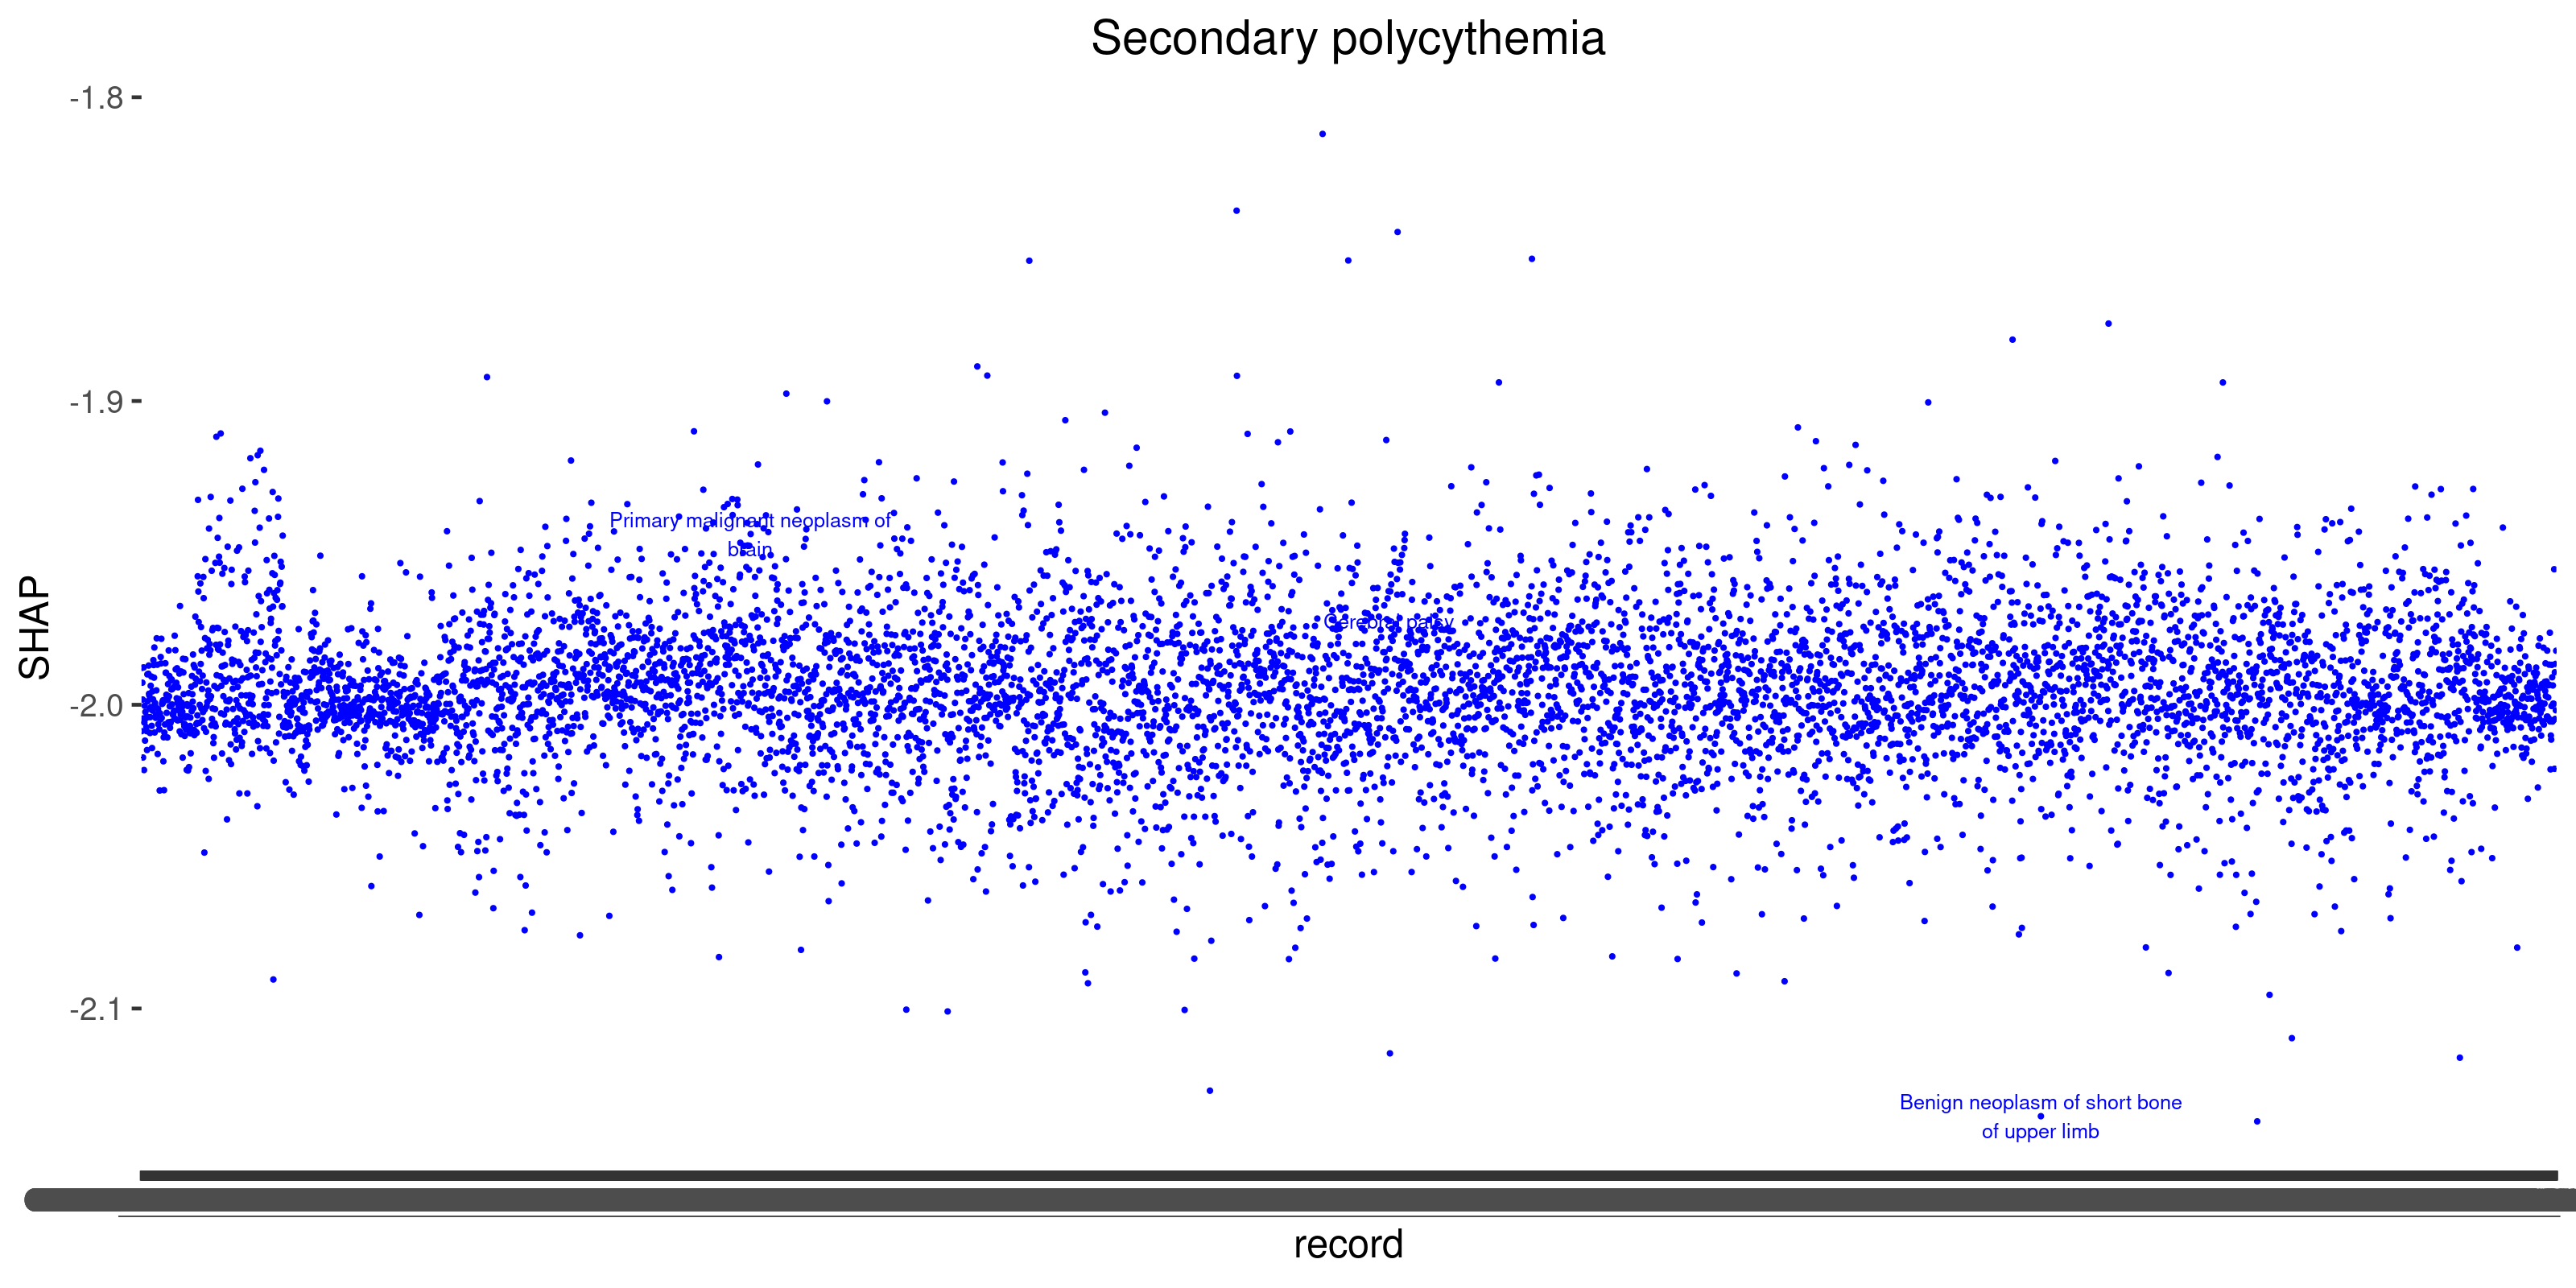

In [16]:
endpoint = "phecode_175-2"

plot_width = 10; plot_height=5; plot_res = 320
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res=plot_res)
endpoint_label = (endpoint_defs %>% filter(endpoint==!!endpoint))$phecode_string

temp = data_shap_md %>% mutate(endpoint = factor(endpoint, levels=endpoint_defs$endpoint)) %>% filter(n>50)
ggplot(temp, aes_string(x="record", y=endpoint, color=endpoint)) + 
    labs(title = endpoint_label, y="SHAP") +
    geom_point(size=0.2) +
    geom_text(data=temp %>% filter(abs(!!sym(endpoint))>0.15), 
              aes(label=stringr::str_wrap(concept_name, 30)), size=2, check_overlap = TRUE)+
    #scale_x_log10()+
    scale_colour_gradient2(low = "blue", mid = alpha("white", 0.01), high = "red", midpoint = 0, limits=c(-0.1, 0.1), oob=scales::squish)+
     #scale_color_viridis_c(option = "plasma")+
    theme(plot.title = element_text(hjust=0.5), legend.position="None")

In [98]:
data_shap_md %>% arrange(desc(overall)) %>% filter(n>10)

record,concept_name,domain_id,n,freq,overall,OMOP_4306655,phecode_001,phecode_002,phecode_002-1,⋯,phecode_950,phecode_954,phecode_976,phecode_979,phecode_979-2,phecode_981,phecode_983,phecode_988,phecode_989,phecode_997
<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
OMOP_4316507,Neoplasm of uncertain behavior of multiple endocrine glands,Condition,12,2.388250e-05,108.54510,0.19394344,0.15291370,0.14887510,0.219178766,⋯,0.048198797,0.09976498,0.16938479,0.5015705824,0.08312907,-0.001175653,-0.052978273,0.1669455171,-0.0828177258,0.19967929
OMOP_4075134,Mediastinal lymph nodes sampling,Procedure,11,2.189229e-05,102.25981,0.13966173,0.11788514,0.11781103,0.061006412,⋯,0.088369220,0.11118857,0.15697682,0.0541748665,0.13226777,0.196845874,0.167633355,0.1051479131,-0.0027438246,0.13813303
OMOP_4135937,CREST syndrome,Condition,56,1.114517e-04,94.78200,0.11560408,0.06983410,0.07070175,0.032701425,⋯,0.033116002,0.10457867,0.16583219,0.0763086677,0.11575963,0.088577069,0.087404467,0.1428264678,0.0353246257,0.16192123
OMOP_4090883,Nasal septal caudal dislocation,Condition,16,3.184333e-05,93.07245,0.01353988,0.08823673,0.08850490,0.039621275,⋯,0.259244561,0.19478635,0.06953980,0.0128361266,0.13956849,0.088921495,0.027674815,0.0345207788,0.1761513501,0.04657204
OMOP_4082311,B-cell chronic lymphocytic leukemia,Condition,296,5.891016e-04,92.36816,0.17449164,0.06261073,0.06267114,0.088515177,⋯,0.062709227,0.13063855,0.10686304,0.0206995942,0.10373958,0.050240874,0.218841404,0.5349791050,-0.1415589750,0.18075292
OMOP_436897,Pasteurella infection,Condition,11,2.189229e-05,87.66770,0.10665541,0.14069837,0.15134181,0.048633184,⋯,0.126176178,0.02648062,0.16581903,0.1503265649,0.02868831,0.021353764,0.094828531,0.0249496233,0.0004759804,0.08304707
OMOP_4098597,Waldenström macroglobulinemia,Condition,29,5.771604e-05,84.07755,0.13493897,0.04160162,0.04099888,0.047553372,⋯,0.008038722,0.16974215,0.07580519,0.0676951408,0.09992085,0.001268900,0.158736944,0.3734722137,-0.1286496073,0.18542823
OMOP_4304484,Chronic myeloproliferative disorder (clinical),Condition,89,1.771285e-04,77.12800,0.14395826,0.07076183,0.07054713,0.067732066,⋯,0.056482624,0.12616132,0.12221561,0.0978463367,0.06832214,0.076606594,0.095871851,0.2287233621,0.0212076586,0.12814307
OMOP_381270,Parkinson's disease,Condition,649,1.291645e-03,76.77953,0.20404322,0.06706253,0.06616977,0.043594930,⋯,0.044912249,0.14104913,0.14308211,0.0087348111,0.10577507,0.131585062,0.121220276,0.0826971531,-0.2566066384,0.18427193


Warning message:
“Removed 1230 rows containing missing values (geom_point).”


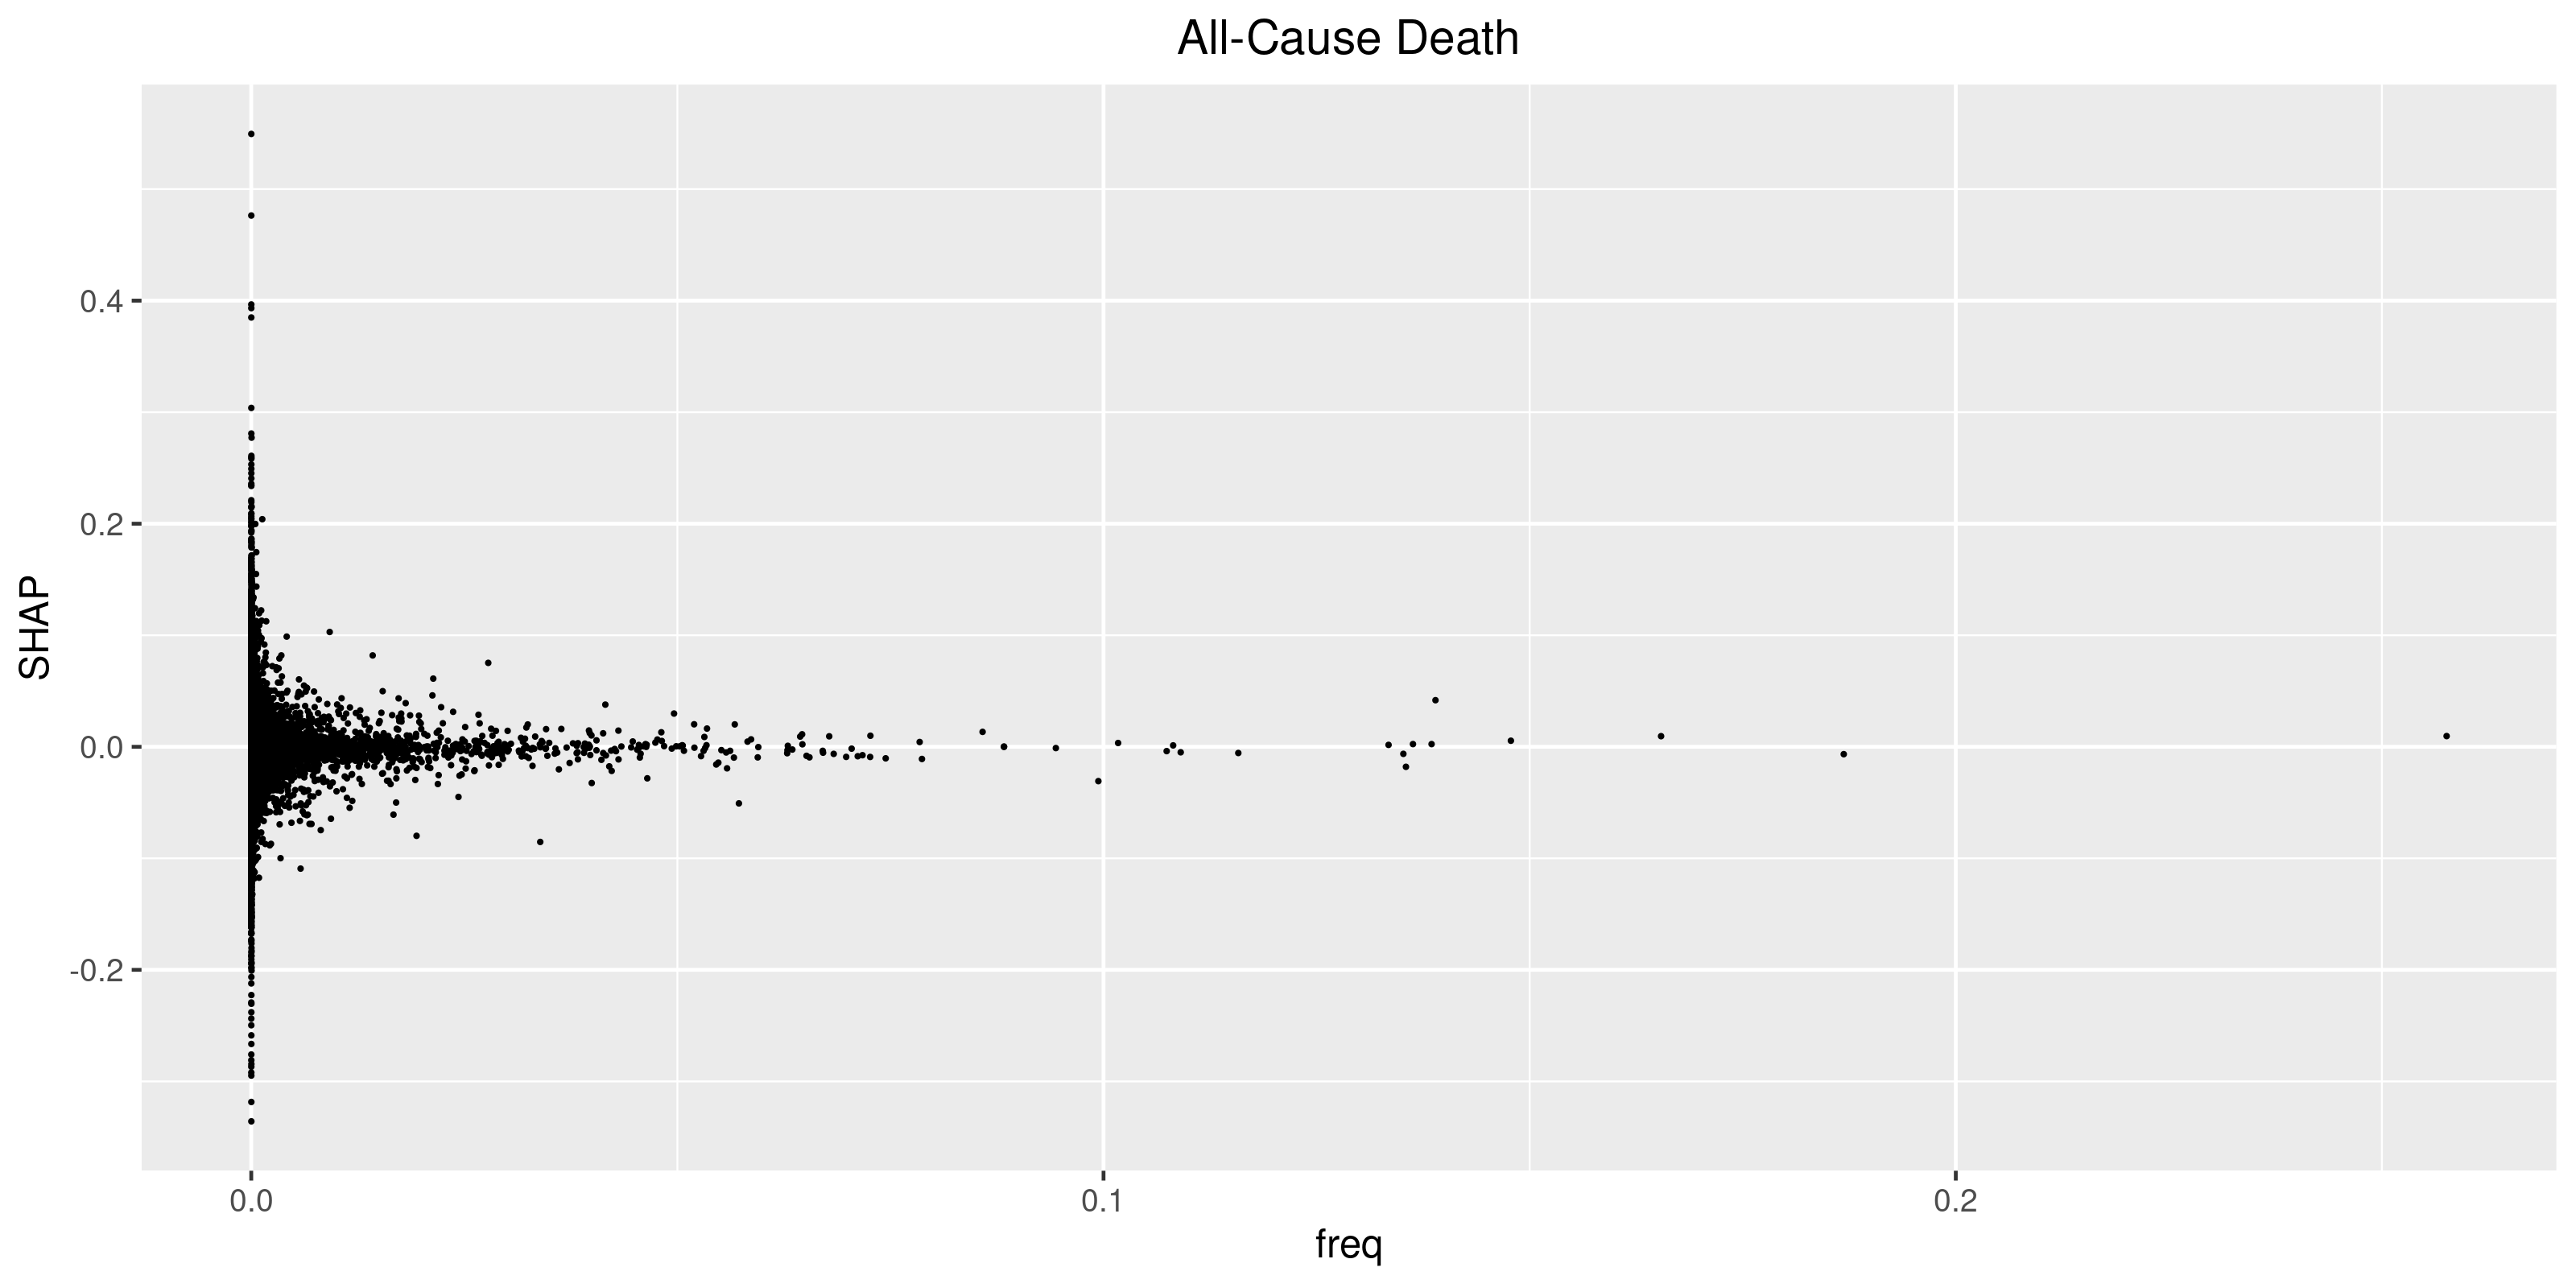

In [99]:
endpoint = "OMOP_4306655"

plot_width = 10; plot_height=5; plot_res = 320
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res=plot_res)

endpoint_label = (endpoint_defs %>% filter(endpoint==!!endpoint))$phecode_string
ggplot(data_shap_md, aes_string(x="freq", y=endpoint)) + 
    labs(title = endpoint_label, y="SHAP") +
    geom_point(size=0.2) +
    #scale_x_log10()+
    #scale_colour_gradient2(low = "blue", mid = alpha("white", 0.1), high = "red", midpoint = 0, limits=c(-0.1, 0.1), oob=scales::squish)+
     #scale_color_viridis_c(option = "plasma")+
    theme(plot.title = element_text(hjust=0.5))

In [55]:
endpoint = "OMOP_4306655"

plot_width = 10; plot_height=5; plot_res = 320
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res=plot_res)
endpoint_label = (endpoint_defs %>% filter(endpoint==!!endpoint))$phecode_string

temp = data_shap_md %>% filter(n>20)
test = ggplot(temp, aes_string(x="record", y=endpoint, color=endpoint)) + 
    labs(title = endpoint_label, y="SHAP") +
    geom_point(size=0.2) +
    geom_text(data=temp %>% filter(abs(!!sym(endpoint))>0.15), 
              aes(label=stringr::str_wrap(concept_name, 30)), size=2, check_overlap = TRUE)+
    #scale_x_log10()+
    scale_colour_gradient2(low = "blue", mid = alpha("white", 0.01), high = "red", midpoint = 0, limits=c(-0.1, 0.1), oob=scales::squish)+
     #scale_color_viridis_c(option = "plasma")+
    theme(plot.title = element_text(hjust=0.5), legend.position="None")

In [54]:
library(plotly)

Warning message:
“package ‘plotly’ was built under R version 4.0.5”

Attaching package: ‘plotly’


The following object is masked from ‘package:arrow’:

    schema


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout




In [63]:
y = ggplotly(test, tooltip="concept_name")

In [64]:
htmlwidgets::saveWidget(y, "death_attributions.html")

## Compare agains event frequency
-> x = SHAP, y=event rate

In [47]:
endpoint_defs

phecode,endpoint,phecode_string,phecode_category,sex,ICD10_only,phecode_top,leaf
<chr>,<glue>,<chr>,<chr>,<chr>,<int>,<chr>,<int>
4306655,OMOP_4306655,All-Cause Death,Death,Both,NA,NA,NA
001,phecode_001,Salmonella,ID,Both,0,001,1
002,phecode_002,Staphylococcus,ID,Both,0,002,0
002.1,phecode_002-1,Staphylococcus aureus,ID,Both,0,002,1
003,phecode_003,Escherichia coli,ID,Both,0,003,1
004,phecode_004,Streptococcus,ID,Both,0,004,0
004.1,phecode_004-1,Streptococcus pneumoniae,ID,Both,0,004,1
005,phecode_005,Mycobacteria,ID,Both,0,005,0
005.1,phecode_005-1,Mycobacterium tuberculosis,ID,Both,0,005,1


In [56]:
endpoint = "OMOP_4306655"

Warning message:
“Removed 1230 rows containing missing values (geom_point).”


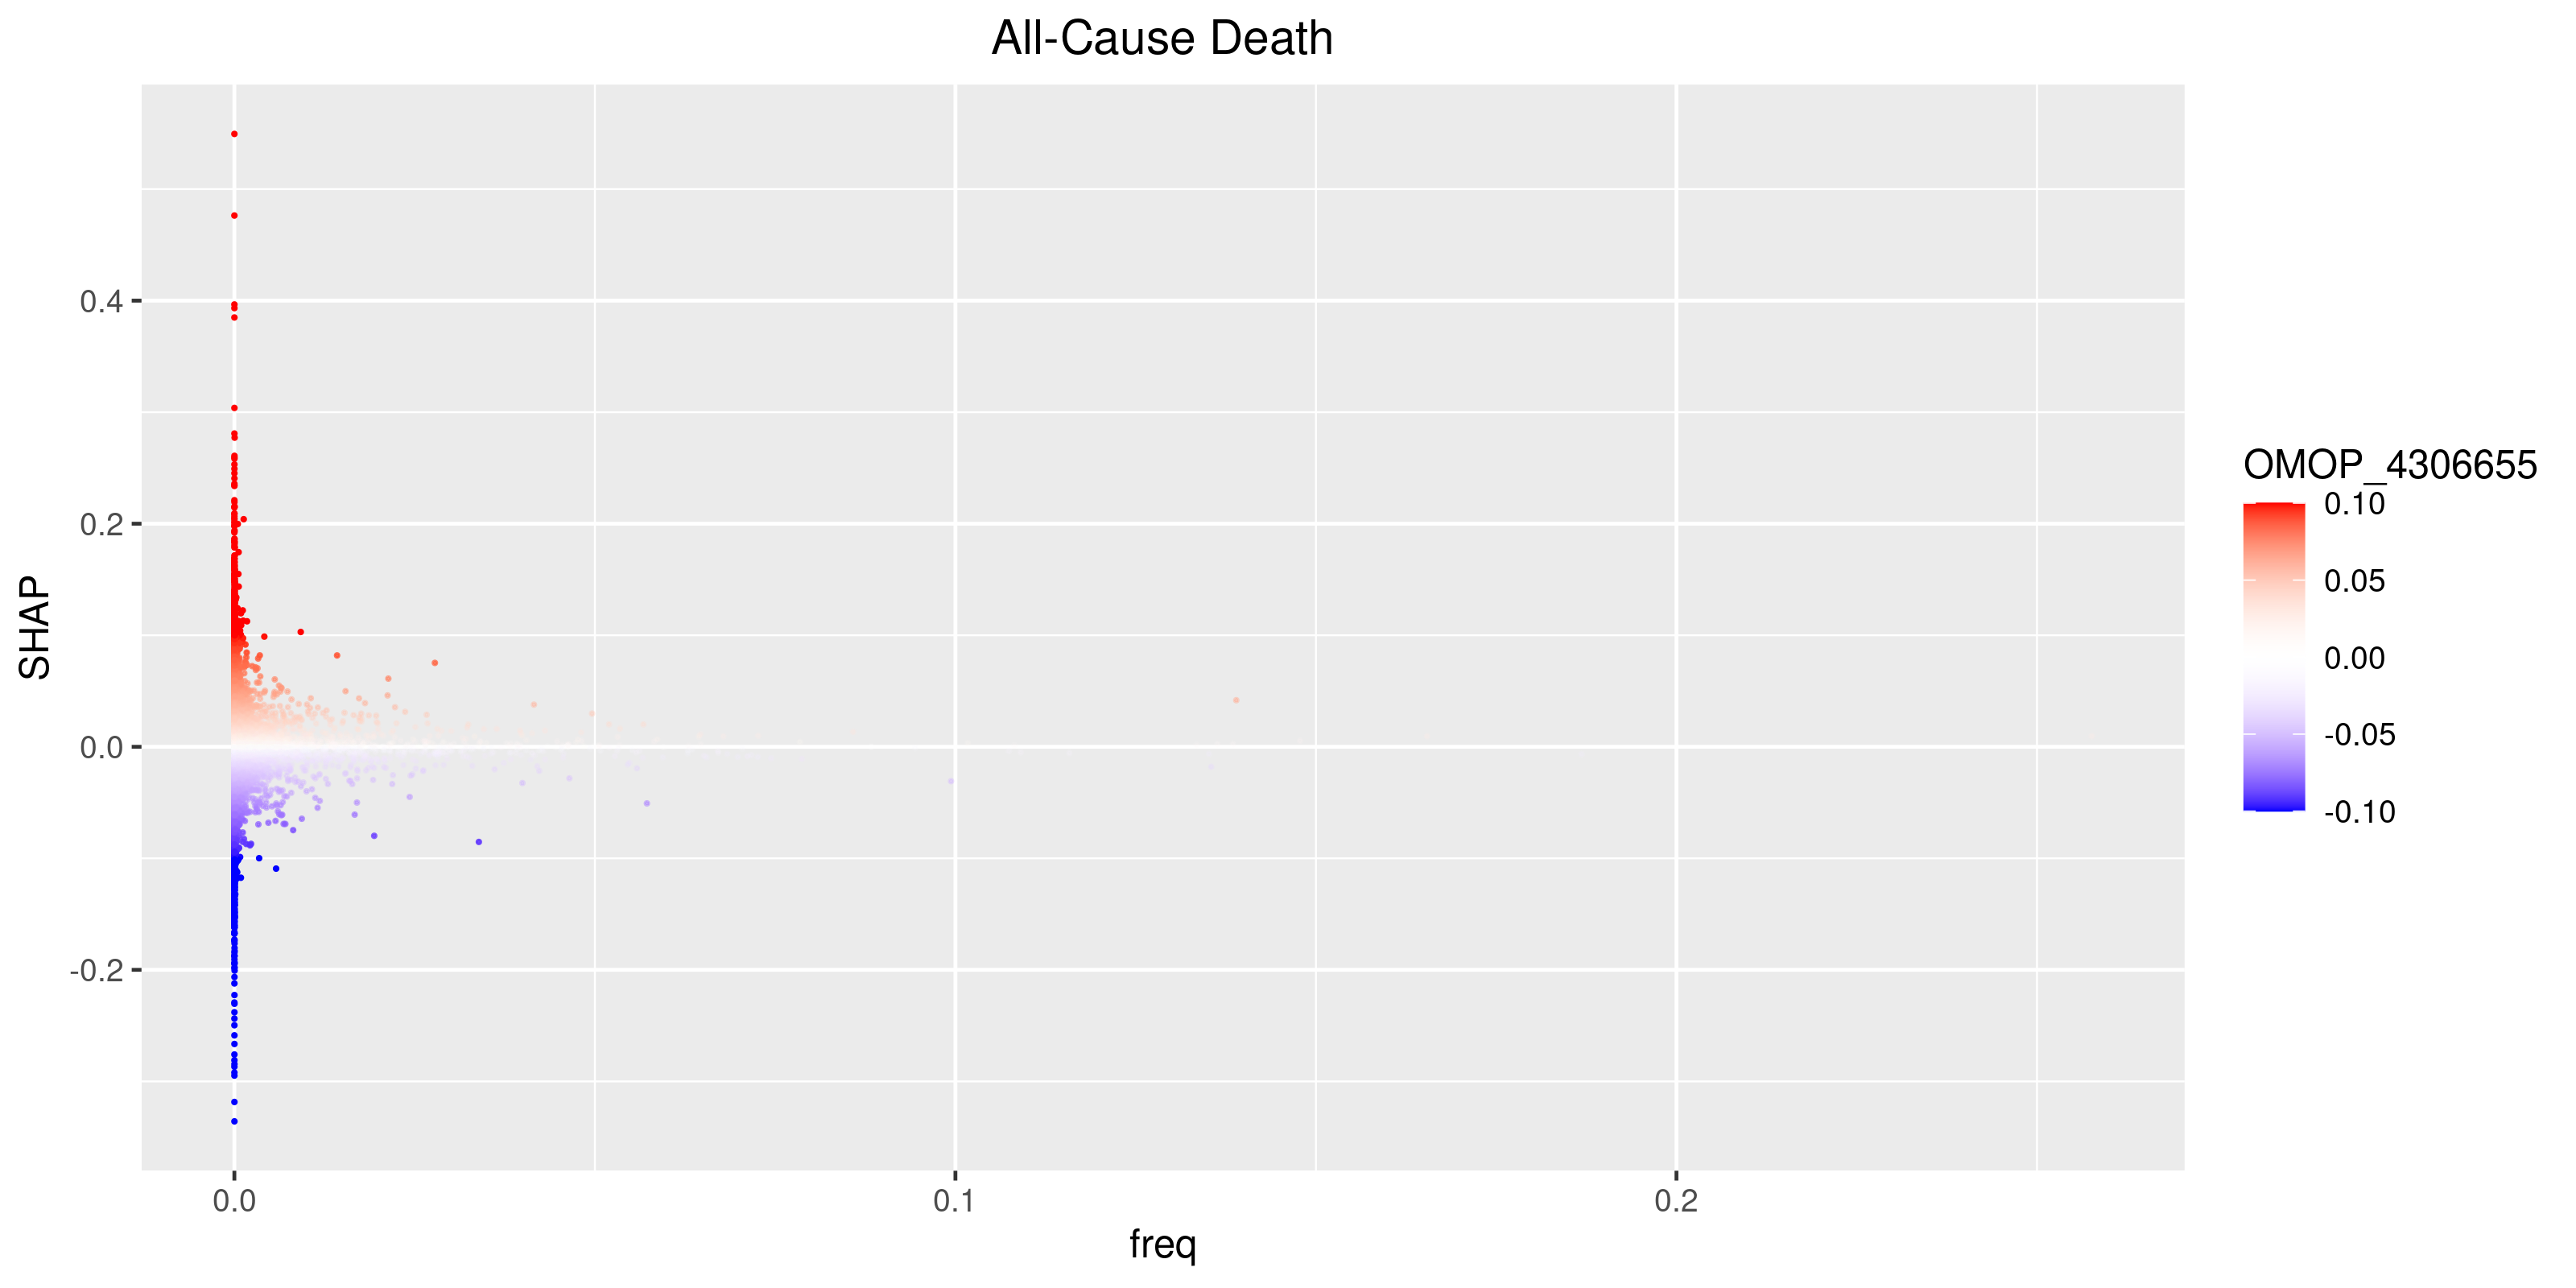

In [81]:
plot_width = 10; plot_height=5; plot_res = 320
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res=plot_res)
endpoint_label = (endpoint_defs %>% filter(endpoint==!!endpoint))$phecode_string
ggplot(data_shap_md, aes_string(x="freq", y=endpoint, color=endpoint)) + 
    labs(title = endpoint_label, y="SHAP") +
    geom_jitter(size=0.2) +
    #scale_x_log10()+
    scale_colour_gradient2(low = "blue", mid = alpha("white", 0.1), high = "red", midpoint = 0, limits=c(-0.1, 0.1), oob=scales::squish)+
     #scale_color_viridis_c(option = "plasma")+
    theme(plot.title = element_text(hjust=0.5))

Warning message:
“Removed 1230 rows containing missing values (geom_point).”


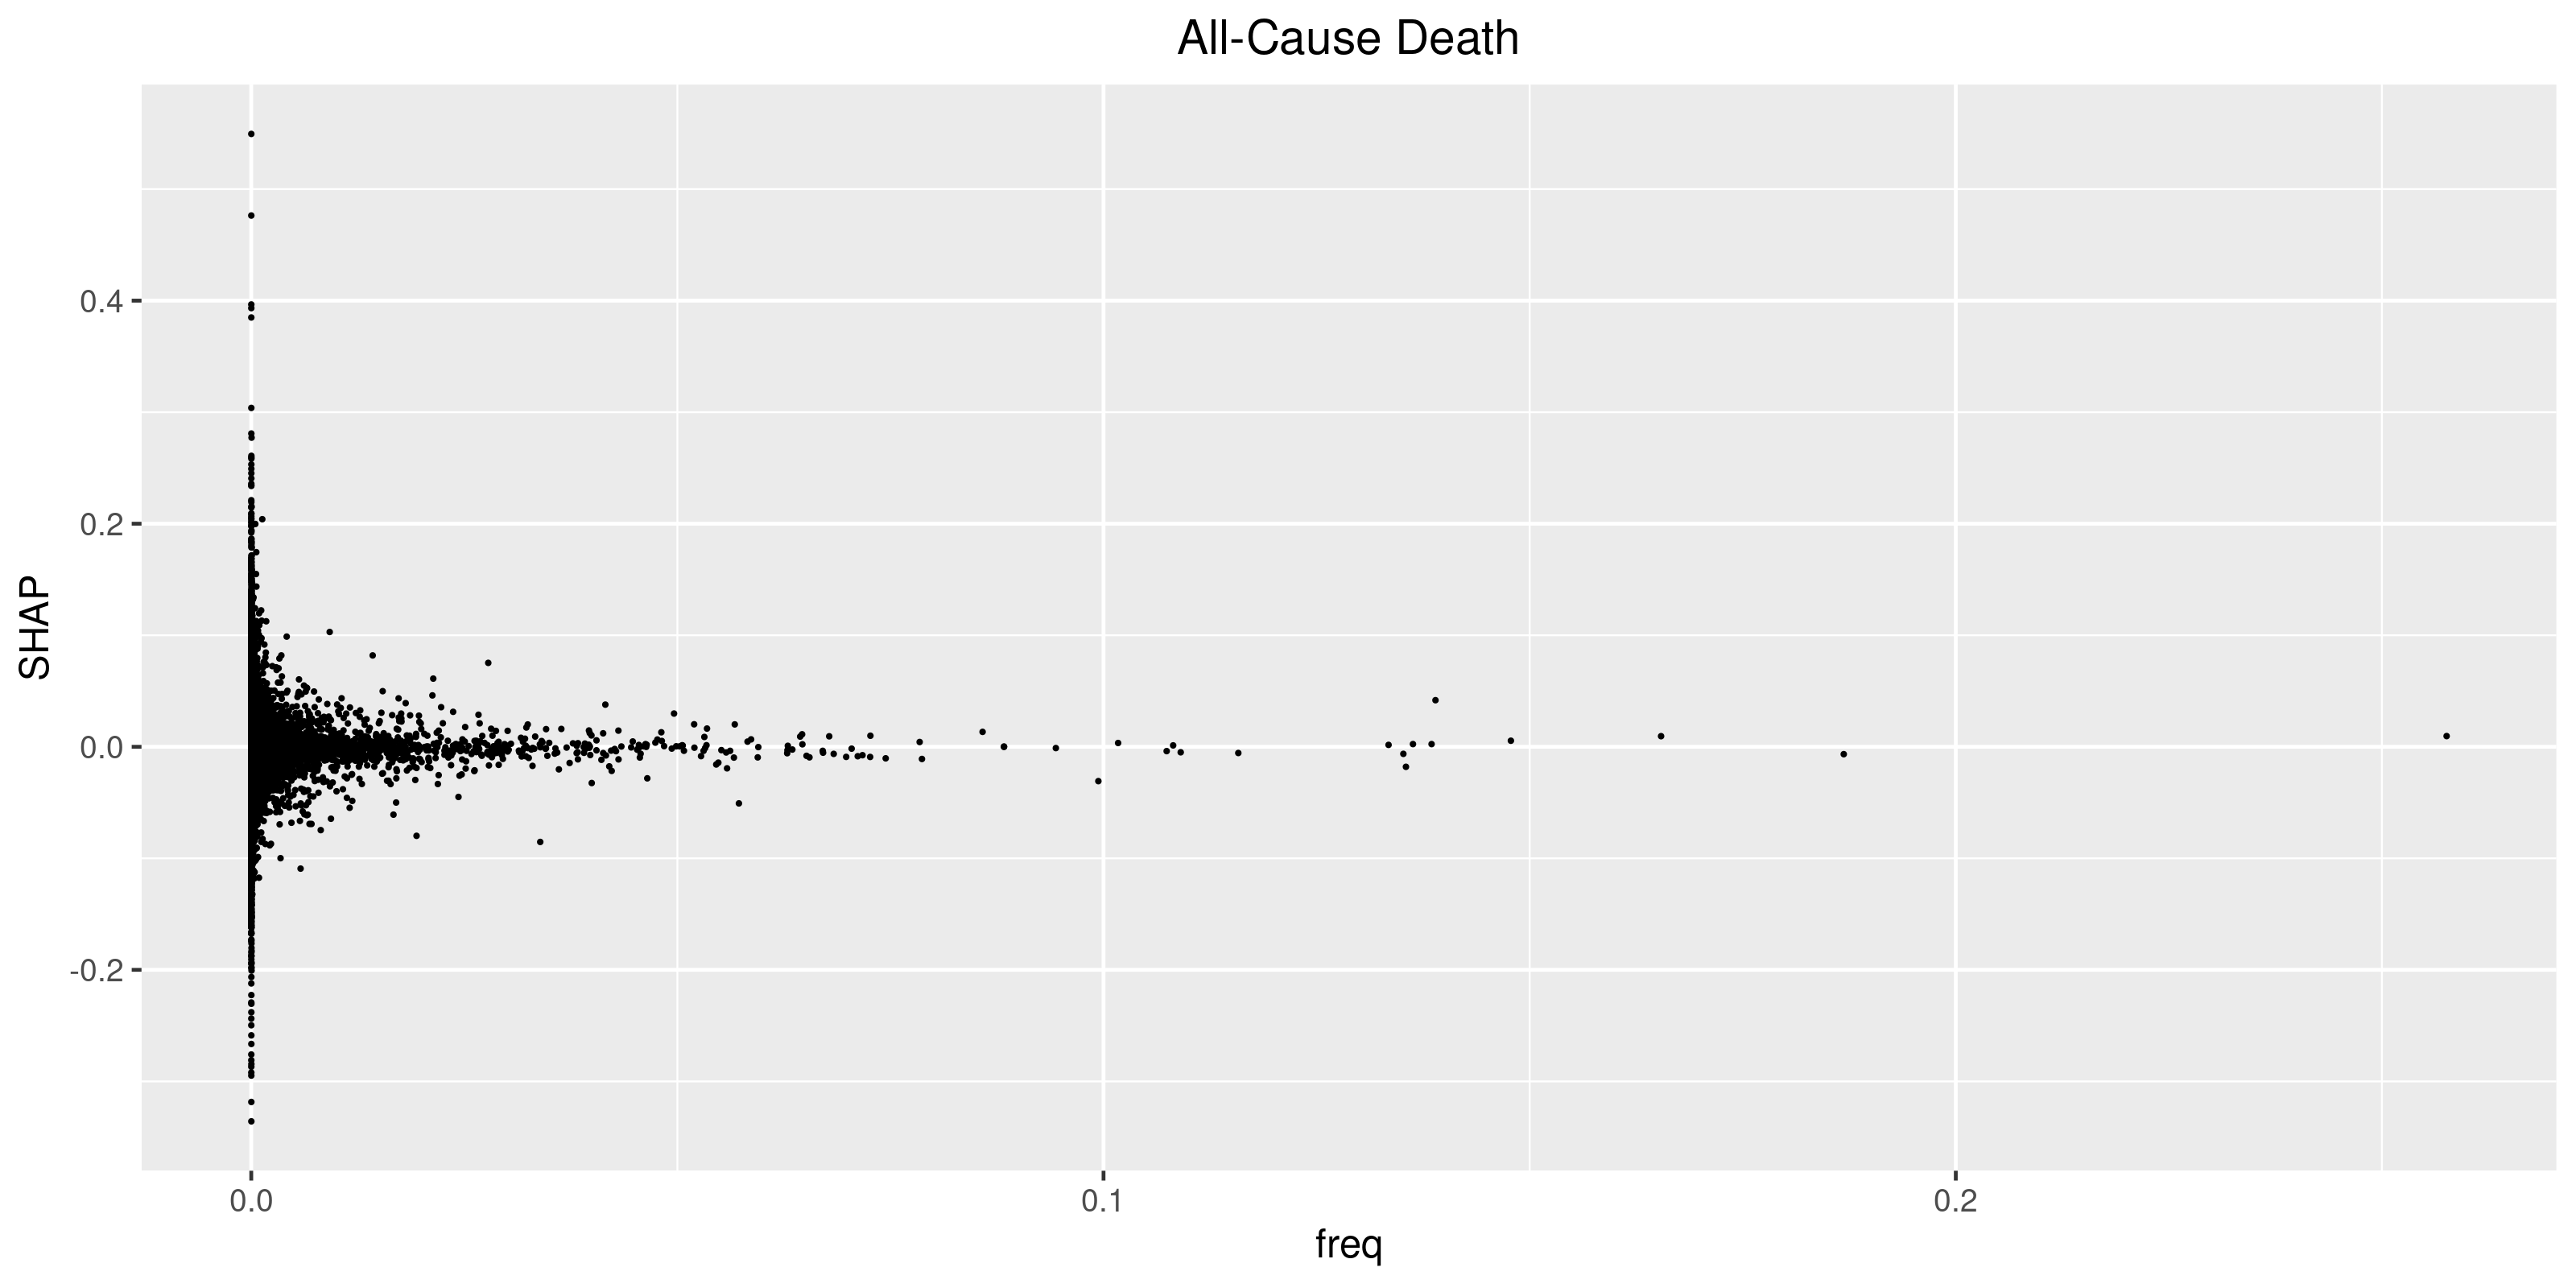

In [83]:
plot_width = 10; plot_height=5; plot_res = 320
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res=plot_res)
endpoint_label = (endpoint_defs %>% filter(endpoint==!!endpoint))$phecode_string
ggplot(data_shap_md, aes_string(x="freq", y=endpoint)) + 
    labs(title = endpoint_label, y="SHAP") +
    geom_point(size=0.2) +
    #scale_x_log10()+
    #scale_colour_gradient2(low = "blue", mid = alpha("white", 0.1), high = "red", midpoint = 0, limits=c(-0.1, 0.1), oob=scales::squish)+
     #scale_color_viridis_c(option = "plasma")+
    theme(plot.title = element_text(hjust=0.5))

In [52]:
data_shap_md %>% arrange(desc(OMOP_4306655)) %>% filter(n>10)

record,concept_name,domain_id,n,freq,OMOP_4306655,phecode_001,phecode_002,phecode_002-1,phecode_003,⋯,phecode_950,phecode_954,phecode_976,phecode_979,phecode_979-2,phecode_981,phecode_983,phecode_988,phecode_989,phecode_997
<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
OMOP_433976,Primary malignant neoplasm of temporal lobe,Condition,18,3.582375e-05,0.2771562,0.098999619,0.098654352,0.25706461,0.122737259,⋯,0.007576761,0.1622533202,0.11056270,0.093047053,0.075185359,0.041660577,0.19514556,0.24577023,-0.308761328,0.066638246
OMOP_4143112,Diagnostic fiberoptic endoscopic ultrasound examination of esophagus,Procedure,15,2.985312e-05,0.2155532,0.070908390,0.071909390,0.20188172,0.082500435,⋯,-0.007999033,0.0242366847,0.13082154,-0.046027306,0.030545382,0.055683699,0.28747943,0.26918313,-0.273903370,0.077108093
OMOP_381270,Parkinson's disease,Condition,649,1.291645e-03,0.2040432,0.067062534,0.066169769,0.04359493,0.116902024,⋯,0.044912249,0.1410491318,0.14308211,0.008734811,0.105775066,0.131585062,0.12122028,0.08269715,-0.256606638,0.184271932
OMOP_78097,Secondary malignant neoplasm of bone,Condition,239,4.756598e-04,0.1997579,0.066274732,0.068021685,0.24484652,0.075675972,⋯,0.012635775,0.0634420961,0.12441500,0.066574663,0.058611941,0.027731802,0.14646818,0.09507069,-0.102891065,0.073344231
OMOP_4316507,Neoplasm of uncertain behavior of multiple endocrine glands,Condition,12,2.388250e-05,0.1939434,0.152913705,0.148875102,0.21917877,0.134220779,⋯,0.048198797,0.0997649804,0.16938479,0.501570582,0.083129071,-0.001175653,-0.05297827,0.16694552,-0.082817726,0.199679285
OMOP_201231,Malignant neoplasm of connective and soft tissue of pelvis,Condition,19,3.781396e-05,0.1824079,0.038235236,0.038618106,0.20082031,0.071866855,⋯,-0.008429917,0.0284496434,0.10281383,-0.024640944,0.060644928,0.100426249,0.20356733,0.16128245,-0.159992501,0.044833411
OMOP_72266,Secondary malignant neoplasm of pleura,Condition,30,5.970625e-05,0.1786416,0.053199425,0.053333640,0.19590503,0.070236318,⋯,0.036411811,0.0581369251,0.11378458,0.043917600,0.053748958,0.059188031,0.13829140,0.08906105,-0.109001085,0.086738683
OMOP_4082311,B-cell chronic lymphocytic leukemia,Condition,296,5.891016e-04,0.1744916,0.062610731,0.062671140,0.08851518,0.138317436,⋯,0.062709227,0.1306385547,0.10686304,0.020699594,0.103739582,0.050240874,0.21884140,0.53497910,-0.141558975,0.180752918
OMOP_4071391,Wide excision of muscle tissue,Procedure,27,5.373562e-05,0.1716049,0.007889741,0.007932658,0.18277679,0.002251231,⋯,-0.145035774,-0.0348232724,0.01940777,0.019757198,-0.028390884,0.008273379,0.06659071,0.02484498,-0.210069984,-0.051940590


In [6]:
predictions = lazy_dt(bind_rows(p0, p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12, p13, p14)) 

In [ ]:
plot_width = 10; plot_height=10; plot_res = 320
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res=plot_res)
temp %>% ggplot(aes(x=logh, color=partition, fill=partition)) + geom_density(alpha=0.2)

In [7]:
base_size = 8
title_size = 10
facet_size = 10
geom_text_size=3
theme_set(theme_classic(base_size = base_size) + 
          theme(strip.background = element_blank(), plot.title=element_text(size=title_size, hjust=0), 
                strip.text.x = element_text(size = facet_size),axis.title=element_text(size=10), axis.text=element_text(size=8, color="black"),
                legend.position="bottom", axis.line = element_line(size = 0.2), axis.ticks=element_line(size=0.2)))

In [8]:
colors_dict = read_json("colors.json")
color_map <- c(
    "Identity(AgeSex)+MLP" = colors_dict$pastel$red$mid,
    "Identity(Records)+MLP" = colors_dict$pastel$red$mid,
    "GNN(Records)+MLP" = colors_dict$pastel$red$mid,
    "Identity(AgeSex+Records)+MLP" = colors_dict$pastel$red$mid,
    "GNN(AgeSex+Records)+MLP" = colors_dict$pastel$red$mid
)

In [9]:
phecode_defs_path = "/sc-projects/sc-proj-ukb-cvd/data/mapping/phecodes/phecode_strings_V2.csv"
phecode_defs = fread(phecode_defs_path, colClasses=c("character", "character", "character", "character", "integer", "character", "integer"))#, dtype={"phecode": str}).sort_values("phecode")
phecode_defs = phecode_defs %>% add_row(phecode = "4306655", phecode_string = "All-Cause Death", phecode_category = "Death", sex="Both")
phecode_defs = phecode_defs %>% as_tibble %>% separate(phecode, into=c("first", "second"), remove=FALSE) %>% 
    mutate(comb = str_remove_all(glue("{first}-{second}"), "-NA")) %>%
    mutate(endpoint=case_when(comb == "4306655" ~ glue("OMOP_{comb}"),
                              TRUE ~ glue("phecode_{comb}"))) %>%
    select(phecode, endpoint, everything(), -first, -second, -comb)
phecode_defs %>% sample_n(5)

Warning message:
“Expected 2 pieces. Missing pieces filled with `NA` in 691 rows [1, 2, 3, 4, 5, 6, 7, 8, 9, 15, 18, 20, 21, 24, 25, 26, 27, 29, 30, 31, ...].”


phecode,endpoint,phecode_string,phecode_category,sex,ICD10_only,phecode_top,leaf
<chr>,<glue>,<chr>,<chr>,<chr>,<int>,<chr>,<int>
604.3,phecode_604-3,Peyronie's disease,Genitourinary,Male,0,604,1
256.5,phecode_256-5,Hypokalemia [Hypopotassemia],Metab,Both,0,256,1
136.3,phecode_136-3,Benign neoplasm of the small intestine,Neoplasms,Both,0,136,1
340.1,phecode_340-1,Critical illness myopathy,Neuro,Both,0,340,1
433.21,phecode_433-21,Carotid artery stenosis,Cardio,Both,0,433,1


In [10]:
outcome_freq = data_outcomes %>% filter(prevalent==0) %>% group_by(endpoint) %>% summarize(freq = sum(event)/n()) %>% as_tibble()
outcome_freq %>% arrange(desc(freq))

endpoint,freq
<chr>,<dbl>
phecode_401,0.22535619
phecode_401-1,0.22471804
phecode_089,0.15780744
phecode_708,0.15229671
phecode_130,0.13742835
phecode_239,0.12403000
phecode_460,0.12011161
phecode_522,0.11723963
phecode_239-1,0.11561741


In [11]:
endpoint_map = phecode_defs$phecode_string
names(endpoint_map) =  phecode_defs$endpoint
endpoint_order_freq = (outcome_freq %>% arrange(desc(freq)))$endpoint

## Load data

In [12]:
list.dirs(path = project_path, full.names = TRUE, recursive = TRUE)

[1] "/sc-projects/sc-proj-ukb-cvd/results/projects/22_medical_records"                        
[2] "/sc-projects/sc-proj-ukb-cvd/results/projects/22_medical_records/.ipynb_checkpoints"     
[3] "/sc-projects/sc-proj-ukb-cvd/results/projects/22_medical_records/data"                   
[4] "/sc-projects/sc-proj-ukb-cvd/results/projects/22_medical_records/data/.ipynb_checkpoints"
[5] "/sc-projects/sc-proj-ukb-cvd/results/projects/22_medical_records/data/predictions"       
[6] "/sc-projects/sc-proj-ukb-cvd/results/projects/22_medical_records/figures"

# Figure 2: Selected Endpoints

## Metabolic state and incident disease

In [13]:
pred_outcomes = predictions %>% left_join(data_outcomes, on=c(eid, endpoint)) %>% as.data.table() 

Joining, by = c("eid", "endpoint")



In [14]:
logh_inc = pred_outcomes %>% filter(prevalent==0) %>% group_by(endpoint, model) %>% mutate(logh_perc = ntile(logh, 100)) %>% ungroup() %>% as_tibble()

## No buffer

In [15]:
logh_T_agg = logh_inc %>% group_by(endpoint, model, logh_perc) %>% summarise(ratio = mean(event)) %>% as_tibble()

`summarise()` has grouped output by 'endpoint', 'model'. You can override using the `.groups` argument.



In [16]:
logh_T_agg %>% write_feather(glue("{output_path}/logh_agg_220224.feather"))

In [17]:
plot_width = 50; plot_height=75; plot_res = 320
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res=plot_res)
#temp_rank = event_rest %>% filter(features=="Metabolomics") %>% arrange(desc(MET10PercvsREST))
endpoint_order = (phecode_defs %>% mutate(phecode_rank = as.numeric(phecode)) %>% arrange(phecode_rank) %>% as_tibble())$endpoint
endpoint_selection = endpoint_order# %>% head(500)
temp = logh_T_agg %>% filter(model=="GNN(Records)+MLP") %>% mutate(endpoint = factor(endpoint, levels=endpoint_order)) %>% filter(endpoint %in% endpoint_selection) %>% ungroup() #%>% sample_n(10000)

mh_events = ggplot(temp, aes(x=logh_perc, y=ratio*100, color=logh_perc)) + 
    labs(title=NULL, x="Medical History Percentile [%]", y="Observed Event Rate [%]") +
    geom_point(alpha=0.7, size=0.1) + 
    scale_colour_gradient(
  low = "#7AC6FF",
  high = "#023768",
  space = "Lab",
  na.value = "grey50",
  guide = "colourbar",
  aesthetics = "colour"
)+
    #scale_color_manual(values=c("Metabolomics"="black"))+
    scale_y_continuous(limits=c(0, NA), expand=expansion(mult=c(0, .05)))+#, limits=c(0, NA))+
    scale_x_continuous(expand=expansion(add=c(0, 1)))+
    facet_wrap(~endpoint, scale="free", labeller = labeller(endpoint = endpoint_map), ncol=25) + theme(legend.position="none")

In [18]:
plot_name = "MedicalHistoryRisk"
mh_events %>% ggsave(filename=glue("outputs/{plot_name}.pdf"), device="pdf", width=plot_width, height=plot_height, dpi=plot_res, limitsize=FALSE)

In [19]:
plot_name = "MedicalHistoryRisk"
mh_events %>% ggsave(filename=glue("outputs/{plot_name}.png"), device="png", width=plot_width, height=plot_height, dpi=plot_res, limitsize=FALSE)

## Add buffer

In [14]:
pred_outcomes %>% head()

eid,partition,model,endpoint,logh,prevalent,event,time
<int>,<fct>,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1475839,0,Identity(Records)+MLP,OMOP_4306655,-2.819316,0,0,12.564256
1475840,0,Identity(Records)+MLP,OMOP_4306655,-2.011223,0,1,6.817248
1475853,0,Identity(Records)+MLP,OMOP_4306655,-2.831062,0,0,12.772336
1475862,0,Identity(Records)+MLP,OMOP_4306655,-2.578309,0,0,11.660746
1475871,0,Identity(Records)+MLP,OMOP_4306655,-3.008898,0,0,11.879779
1475886,0,Identity(Records)+MLP,OMOP_4306655,-3.047699,0,0,12.646393


In [15]:
logh_T_agg_buffer = pred_outcomes %>% filter(prevalent==0) %>% mutate(event_buffer = case_when((event!=0&time<1) ~ 0, TRUE ~ event)) %>% group_by(endpoint, model) %>% mutate(logh_perc = ntile(logh, 100)) %>% group_by(endpoint, model, logh_perc) %>% summarise(ratio = mean(event_buffer)) %>% as_tibble()

`summarise()` has grouped output by 'endpoint', 'model'. You can override using the `.groups` argument.



In [16]:
logh_T_agg_buffer %>% write_feather(glue("{output_path}/logh_agg_1ybuffer_220224.feather"))

In [17]:
plot_width = 50; plot_height=75; plot_res = 320
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res=plot_res)
#temp_rank = event_rest %>% filter(features=="Metabolomics") %>% arrange(desc(MET10PercvsREST))
endpoint_order = (phecode_defs %>% mutate(phecode_rank = as.numeric(phecode)) %>% arrange(phecode_rank) %>% as_tibble())$endpoint
endpoint_selection = endpoint_order# %>% head(500)
temp = logh_T_agg_buffer %>% filter(model=="GNN(Records)+MLP") %>% mutate(endpoint = factor(endpoint, levels=endpoint_order)) %>% filter(endpoint %in% endpoint_selection) %>% ungroup() #%>% sample_n(10000)

mh_events = ggplot(temp, aes(x=logh_perc, y=ratio*100, color=logh_perc)) + 
    labs(title=NULL, x="Medical History Percentile [%]", y="Observed Event Rate [%]") +
    geom_point(alpha=0.7, size=0.1) + 
    scale_colour_gradient(
  low = "#7AC6FF",
  high = "#023768",
  space = "Lab",
  na.value = "grey50",
  guide = "colourbar",
  aesthetics = "colour"
)+
    #scale_color_manual(values=c("Metabolomics"="black"))+
    scale_y_continuous(limits=c(0, NA), expand=expansion(mult=c(0, .05)))+#, limits=c(0, NA))+
    scale_x_continuous(expand=expansion(add=c(0, 1)))+
    facet_wrap(~endpoint, scale="free", labeller = labeller(endpoint = endpoint_map), ncol=25) + theme(legend.position="none")

In [18]:
plot_name = "MedicalHistoryRisk_1ybuffer"
mh_events %>% ggsave(filename=glue("outputs/{plot_name}.png"), device="png", width=plot_width, height=plot_height, dpi=plot_res, limitsize=FALSE)

## Metabolomic State and Event Trajectories

In [19]:
logh_mh = logh_inc %>% select(endpoint, model, eid, logh_perc, event, time) %>% group_by(endpoint) %>% 
    mutate(MH=case_when(logh_perc %in% 91:100 ~ "High", 
                        logh_perc %in% 45:55 ~ "Mid", 
                        logh_perc %in% 1:10 ~ "Low",
                        TRUE ~ "NA")
          ) %>% mutate(MET = fct_rev(factor(MET, levels=c("Low", "Mid", "High")))) %>% ungroup() %>% 
    filter(MH!="NA") #%>% select(eid, endpoint, logh, logh_group)

In [23]:
require("ggquickeda")
plot_width = 50; plot_height=75; plot_res = 320
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res=plot_res)
met_map = c("High"="#023768", "Mid"="#4F8EC1", "Low"="#7AC6FF")

endpoint_order = (phecode_defs %>% mutate(phecode_rank = as.numeric(phecode)) %>% arrange(phecode_rank) %>% as_tibble())$endpoint
endpoint_selection = endpoint_order# %>% head(500)
temp = logh_mh %>% mutate(endpoint = factor(endpoint, levels=endpoint_order)) %>% filter(endpoint %in% endpoint_selection) %>% ungroup() 

km_plot = ggplot(temp, aes(time = time, status = event, fill=MET, color=MET,group=MET)) +
    geom_km(trans = "event") + 
    geom_kmticks(trans = "event", size=0.3) + geom_kmband(trans = "event") + 
    labs(x="Time [Years]", y="Cumulative Events [%]")+
    scale_color_manual(values=met_map)+scale_fill_manual(values=met_map)+
    scale_y_continuous(labels = function(x) round(x*100, 1), expand=c(0, 0))+
    scale_x_continuous(expand=expansion(add=c(0, .1)), breaks=c(5, 10))+
    facet_wrap(~ endpoint, scale="free", labeller = labeller(endpoint = endpoint_map), ncol=25) + theme(legend.position="none")

In [ ]:
plot_name = "MedicalHistory_KMs"
km_plot %>% ggsave(filename=glue("outputs/{plot_name}.png"), device="png", width=plot_width, height=plot_height, dpi=plot_res, limitsize=FALSE)

# Top 1%

In [26]:
logh_mh = logh_inc %>% select(endpoint, model, eid, logh_perc, event, time) %>% group_by(endpoint) %>% 
    mutate(MH=case_when(logh_perc == 100 ~ "High", 
                        logh_perc %in% 50:51 ~ "Mid", 
                        logh_perc == 1 ~ "Low",
                        TRUE ~ "NA")
          ) %>% mutate(MET = fct_rev(factor(MH, levels=c("Low", "Mid", "High")))) %>% ungroup() %>% 
    filter(MH!="NA") #%>% select(eid, endpoint, logh, logh_group)

In [27]:
require("ggquickeda")
plot_width = 50; plot_height=75; plot_res = 320
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res=plot_res)
mh_map = c("High"="#023768", "Mid"="#4F8EC1", "Low"="#7AC6FF")

endpoint_order = (phecode_defs %>% mutate(phecode_rank = as.numeric(phecode)) %>% arrange(phecode_rank) %>% as_tibble())$endpoint
endpoint_selection = endpoint_order# %>% head(500)
temp = logh_mh %>% mutate(endpoint = factor(endpoint, levels=endpoint_order)) %>% filter(endpoint %in% endpoint_selection) %>% ungroup() 

km_plot = ggplot(temp, aes(time = time, status = event, fill=MH, color=MH,group=MH)) +
    geom_km(trans = "event") + 
    geom_kmticks(trans = "event", size=0.3) + geom_kmband(trans = "event") + 
    labs(x="Time [Years]", y="Cumulative Events [%]")+
    scale_color_manual(values=met_map)+scale_fill_manual(values=mh_map)+
    scale_y_continuous(labels = function(x) round(x*100, 1), expand=c(0, 0))+
    scale_x_continuous(expand=expansion(add=c(0, .1)), breaks=c(5, 10))+
    facet_wrap(~ endpoint, scale="free", labeller = labeller(endpoint = endpoint_map), ncol=25) + theme(legend.position="none")

In [28]:
plot_name = "MedicalHistory_KMs_Top1"
km_plot %>% ggsave(filename=glue("outputs/{plot_name}.png"), device="png", width=plot_width, height=plot_height, dpi=plot_res, limitsize=FALSE)

# Figure 2

In [ ]:
plot_width=8.25; plot_height=10; plot_dpi=320
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res=plot_dpi)
fig2 = met_events / km_plot# +plot_annotation(tag_levels = 'A')

In [ ]:
fig2

In [ ]:
library(gt)
plot_name = "Figures_2_AB"
fig2 %>% ggsave(filename=glue("outputs/{plot_name}.pdf"), device="pdf", width=plot_width, height=plot_height, dpi=320)